In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

<h1>Load the data</h1>
<p>Load the data</p>
<p>Seperate the target and the inputs</p>

In [126]:
data = pd.read_csv('gtd_utf.csv', encoding='latin1', low_memory=False)

<h1>Preprocessing of Data</h1>
<p>Remove any features that are not required<p>
<p>Set up data into the GTD object<p>

In [37]:
from collections import Counter

threshold = 10

#gtd = data

group_count = Counter(data['gname'])
groups = [group for group, counter in group_count.items() if counter >= threshold]
#print(len(groups))

data = data[data['gname'].isin(groups)]
#print(len(data))

data = data[(data['region']==2) & (data['gname']!='Unknown')]
total_region2 = len(data)

group_count = Counter(data['gname'])
groups = [group for group, counter in group_count.items() if counter >= threshold]
print("Groups: " + str(len(groups)))

#data = region2

Groups: 35


In [85]:
# Seperate the target from the data

print(data.shape)

targetLabelEncoder = preprocessing.LabelEncoder()
targetLabelEncoder.fit(data['gname'].unique())
requiredtarget = targetLabelEncoder.transform(data['gname'])

requireduniquetarget = [data['gname'].unique(), list(range(len(data['gname'].unique())))]
requireduniquetarget2 = [list(range(len(data['gname'].unique()))), data['gname'].unique()]

print(len(requiredtarget))

(6255, 137)
6255


In [86]:
from sklearn.feature_extraction import DictVectorizer
features = data[['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt','weaptype1_txt' ,'extended']]#, 
                 #'specificity','vicinity', 'crit1','crit2','crit3', 'multiple', 'success', 'suicide' , 'attacktype2_txt',
                 #'attacktype3_txt','targsubtype1_txt', 'corp1','target1', 'natlty1_txt', 'targtype2_txt', 'targsubtype2_txt', 
                 #'corp2', 'target2','natlty2_txt']]
# features = data[['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'extended', 'specificity', 'vicinity', 
#                 'crit1','crit2','crit3','doubtterr', 'alternative', 'multiple', 'success', 'suicide', 'attacktype2_txt', 'attacktype3_txt', 
#                 'targsubtype1_txt', 'corp1','target1', 'natlty1_txt', 'targtype2_txt', 'targsubtype2_txt', 'corp2', 'target2','natlty2_txt',
#                  'targtype3_txt', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'guncertain1', 'guncertain2', 'guncertain3', 
#                  'nperps', 'nperpcap','claimed','claimmode_txt', 'claim2', 'claimmode2_txt', 'claim3','claimmode3_txt', 'compclaim', 'weaptype1_txt',
#                 'weapsubtype1_txt','weaptype2_txt','weapsubtype2_txt', 'weaptype3_txt']] 
# , 'suicide'


df = (pd.DataFrame(features)).to_dict(orient='records')
dv = DictVectorizer(sparse=False) 
output = dv.fit_transform(features.to_dict(orient='records'))

print(output.shape)

#print(dv.feature_names_)

(6255, 51)


In [52]:
#print(requiredtarget.shape)
#print(requiredtarget)
#print(requireduniquetarget)

<h1>Apply K-Nearest Neighbours</h1>

In [97]:
# Change this to sklearn split
test_examples = 600
train_X = output[:-test_examples,:]
train_Y = requiredtarget[:-test_examples]
test_X = output[-test_examples:,:]
test_Y = requiredtarget[-test_examples:]

print(output.shape)
print(requiredtarget.shape)
print()
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

#print(test_Y)

test_Y_classnames = list(targetLabelEncoder.inverse_transform(test_Y))

target_names_not_sure = np.unique(test_Y_classnames)
print("Test target groups: " + str(len(target_names_not_sure)))

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X, train_Y) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
predicted_Y = knn.predict(test_X)
# true is test_Y



(6255, 51)
(6255,)

(5655, 51)
(5655,)
(600, 51)
(600,)
Test target groups: 13


In [89]:
#from sklearn.metrics import confusion_matrix
import sklearn

count_correct = 0

for i in range(len(test_Y)):
    if test_Y[i] == predicted_Y[i]:
        count_correct = count_correct + 1

print(str(count_correct / len(test_Y) * 100) + "% accuracy using KNN")


72.83333333333334% accuracy using KNN


13

13
5
haha
(14, 14)
13


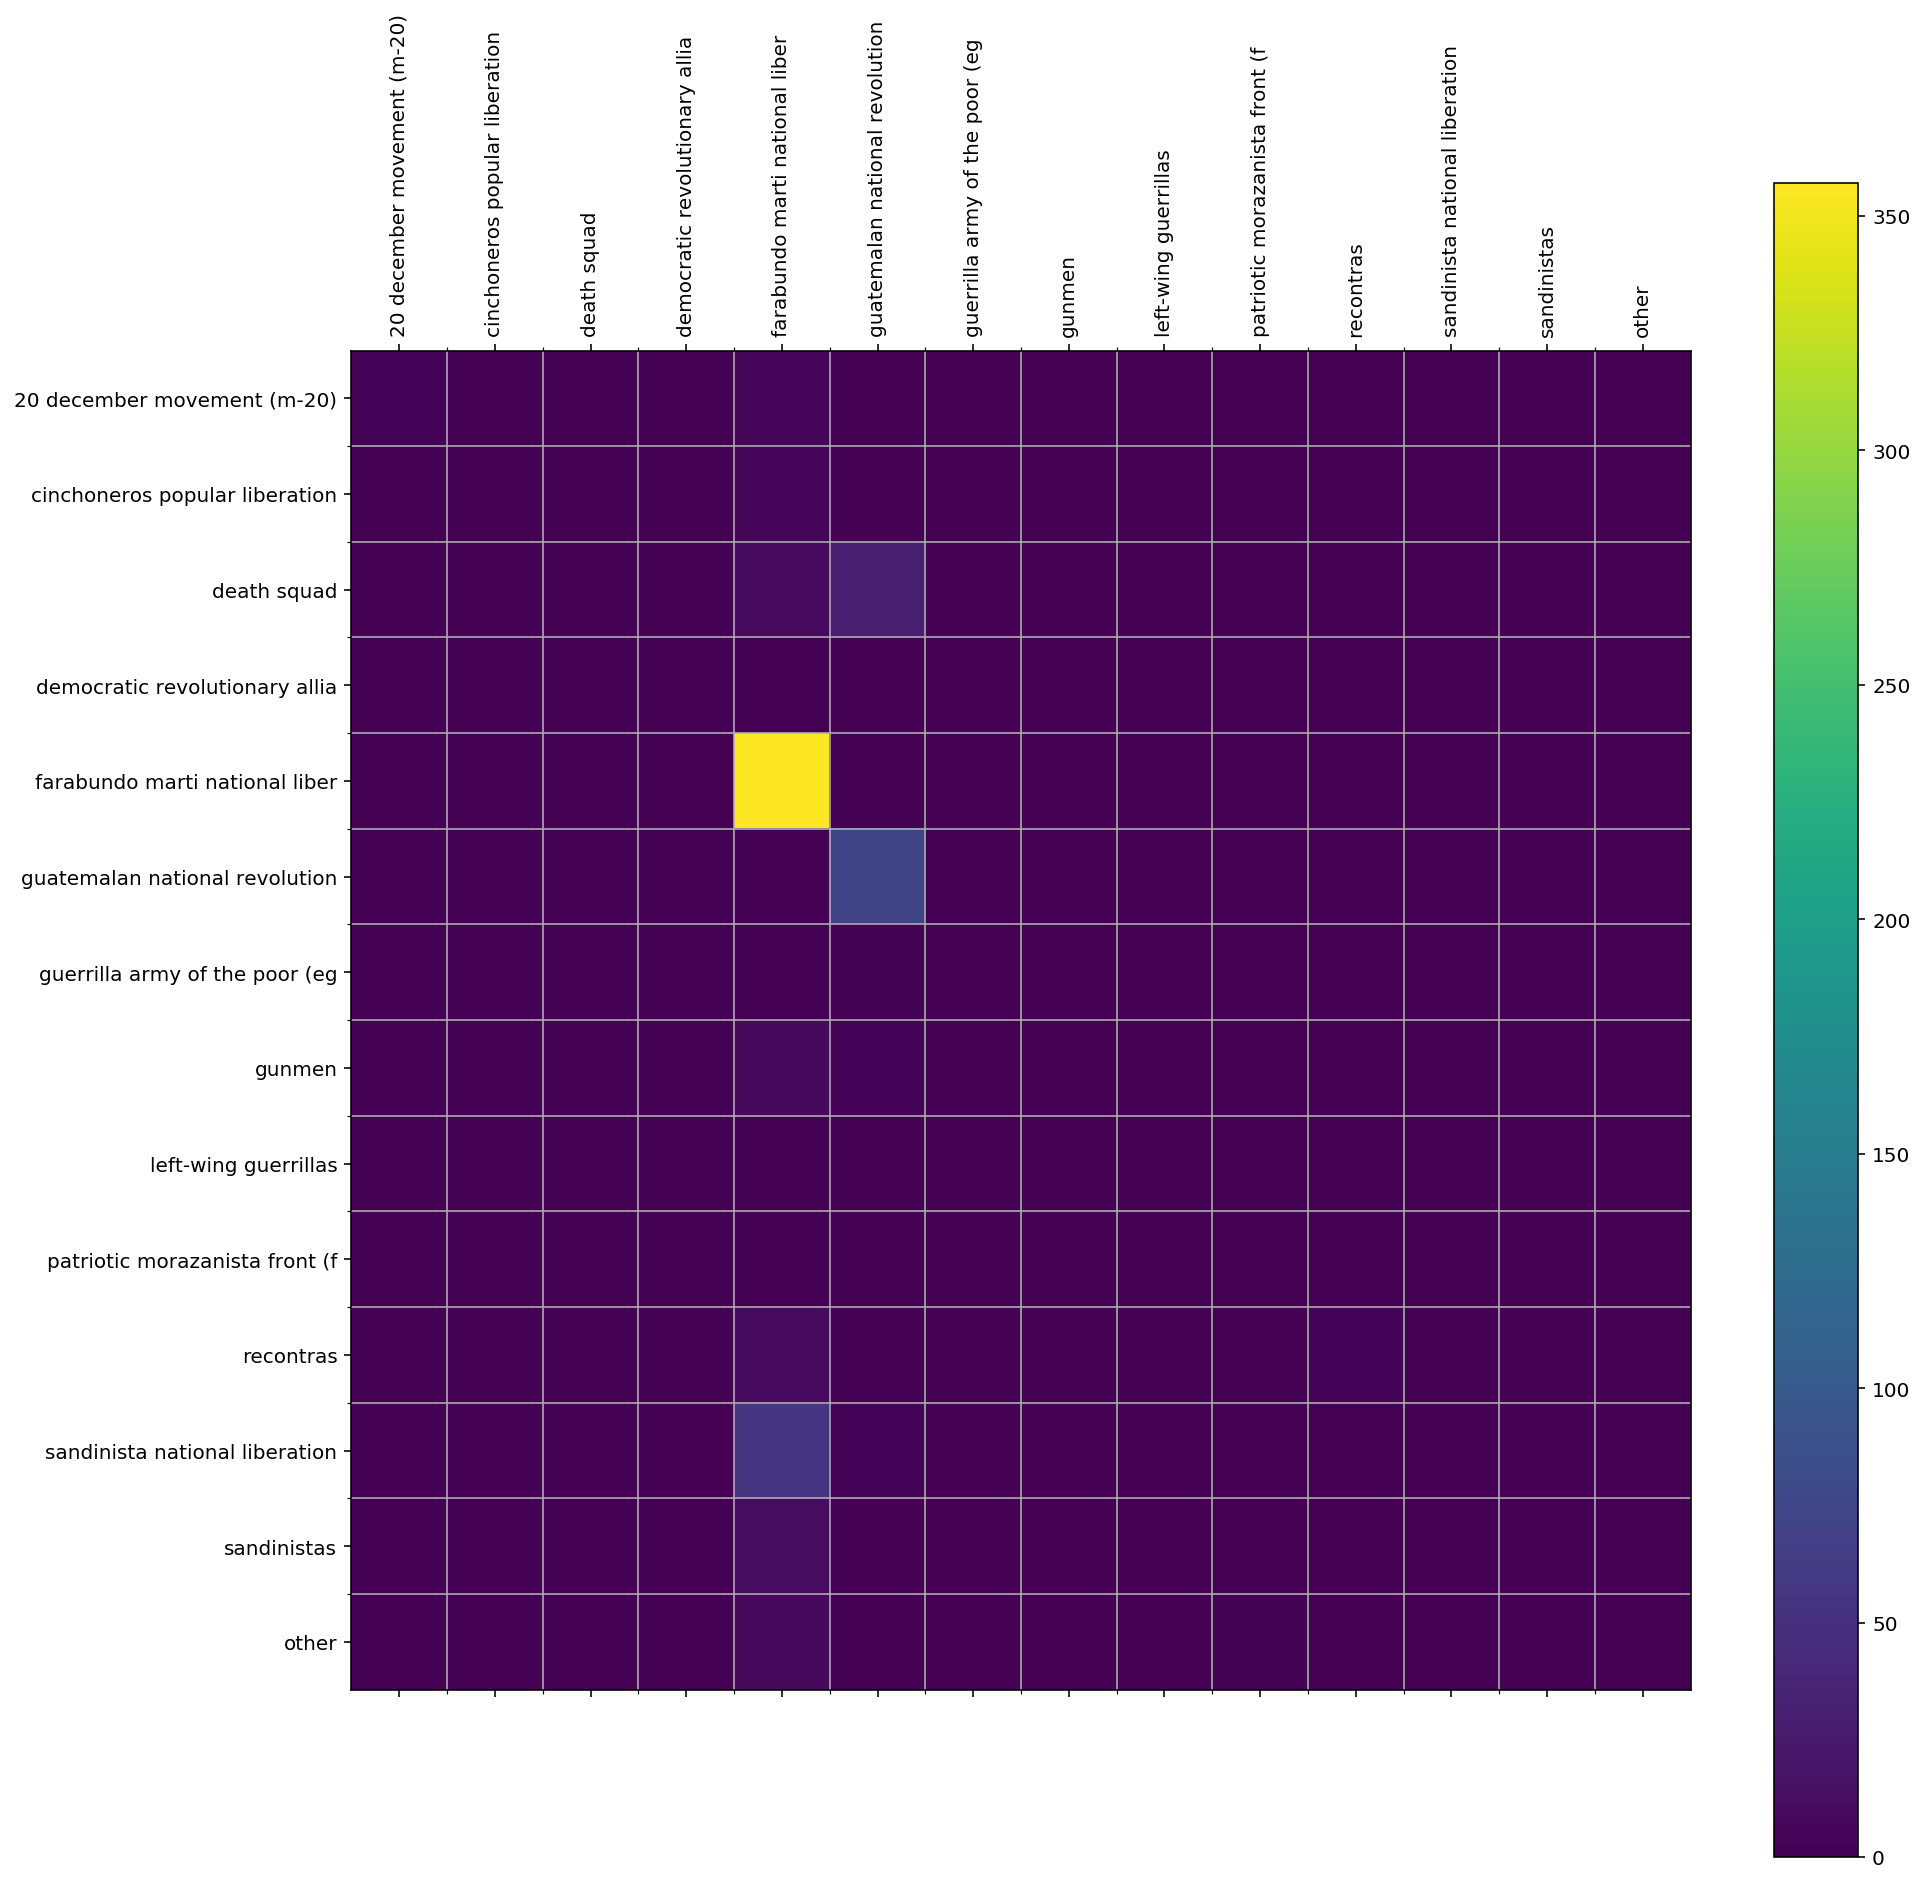

In [110]:
#print(len(test_Y))
#print(len(predicted_Y))

print(len(target_names_not_sure))
class_names = target_names_not_sure
class_names2 = [word[:30].lower() for word in class_names]

#confusion_matrix = sklearn.metrics.confusion_matrix(test_Y, predicted_Y, labels=class_names2)
confusion_matrix = sklearn.metrics.confusion_matrix(test_Y, predicted_Y)

print()
print(len(np.unique(test_Y)))
print(len(np.unique(predicted_Y)))
print("haha")

#print(test_groups.shape)
print(confusion_matrix.shape)
print(len(class_names))

#print(class_names)

plt.figure()
plt.rcParams['figure.figsize'] = (15, 15)

plt.matshow(confusion_matrix, interpolation='nearest')
plt.colorbar()

plt.xticks(np.arange(0,len(class_names2)+1), class_names2 + ["other"])
plt.yticks(np.arange(0,len(class_names2)+1), class_names2 + ["other"])

plt.xticks(rotation=90)

plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
plt.grid(which='minor')

plt.show()

<h1>Apply SVM</h1>

In [122]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_X, train_Y)
svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
#dec = clf.decision_function([[1]])
#dec.shape[1] # 4 classes: 4*3/2 = 6

clf.decision_function_shape = "ovr"
#dec = clf.decision_function([[1]])
#dec.shape[1] # 4 classes

predicted_Y_SVM = clf.predict(test_X)

count_correct_SVM = 0

for i in range(len(test_Y)):
    if test_Y[i] == predicted_X_SVM[i]:
        count_correct_SVM = count_correct_SVM + 1

print(str(count_correct_SVM / len(test_Y) * 100) + "% accuracy using SVM")

sklearn.metrics.recall_score(test_Y, predicted_X_SVM, average='micro')

71.83333333333334% accuracy using SVM


0.71833333333333338

In [125]:
group_count = Counter(test_Y)
groups = [group for group, counter in group_count.items() if counter >= 0]
print(group_count)

group_count = Counter(predicted_Y_SVM)
groups = [group for group, counter in group_count.items() if counter >= 0]
print(group_count)

print("71% is better than 59% assuming only farabundo")

Counter({9: 357, 12: 74, 28: 60, 6: 42, 23: 13, 30: 12, 31: 12, 15: 12, 0: 9, 4: 5, 13: 2, 7: 1, 16: 1})
Counter({9: 424, 12: 108, 22: 68})
71% is better than 59% assuming only farabundo


13

13
5
haha
(14, 14)
13


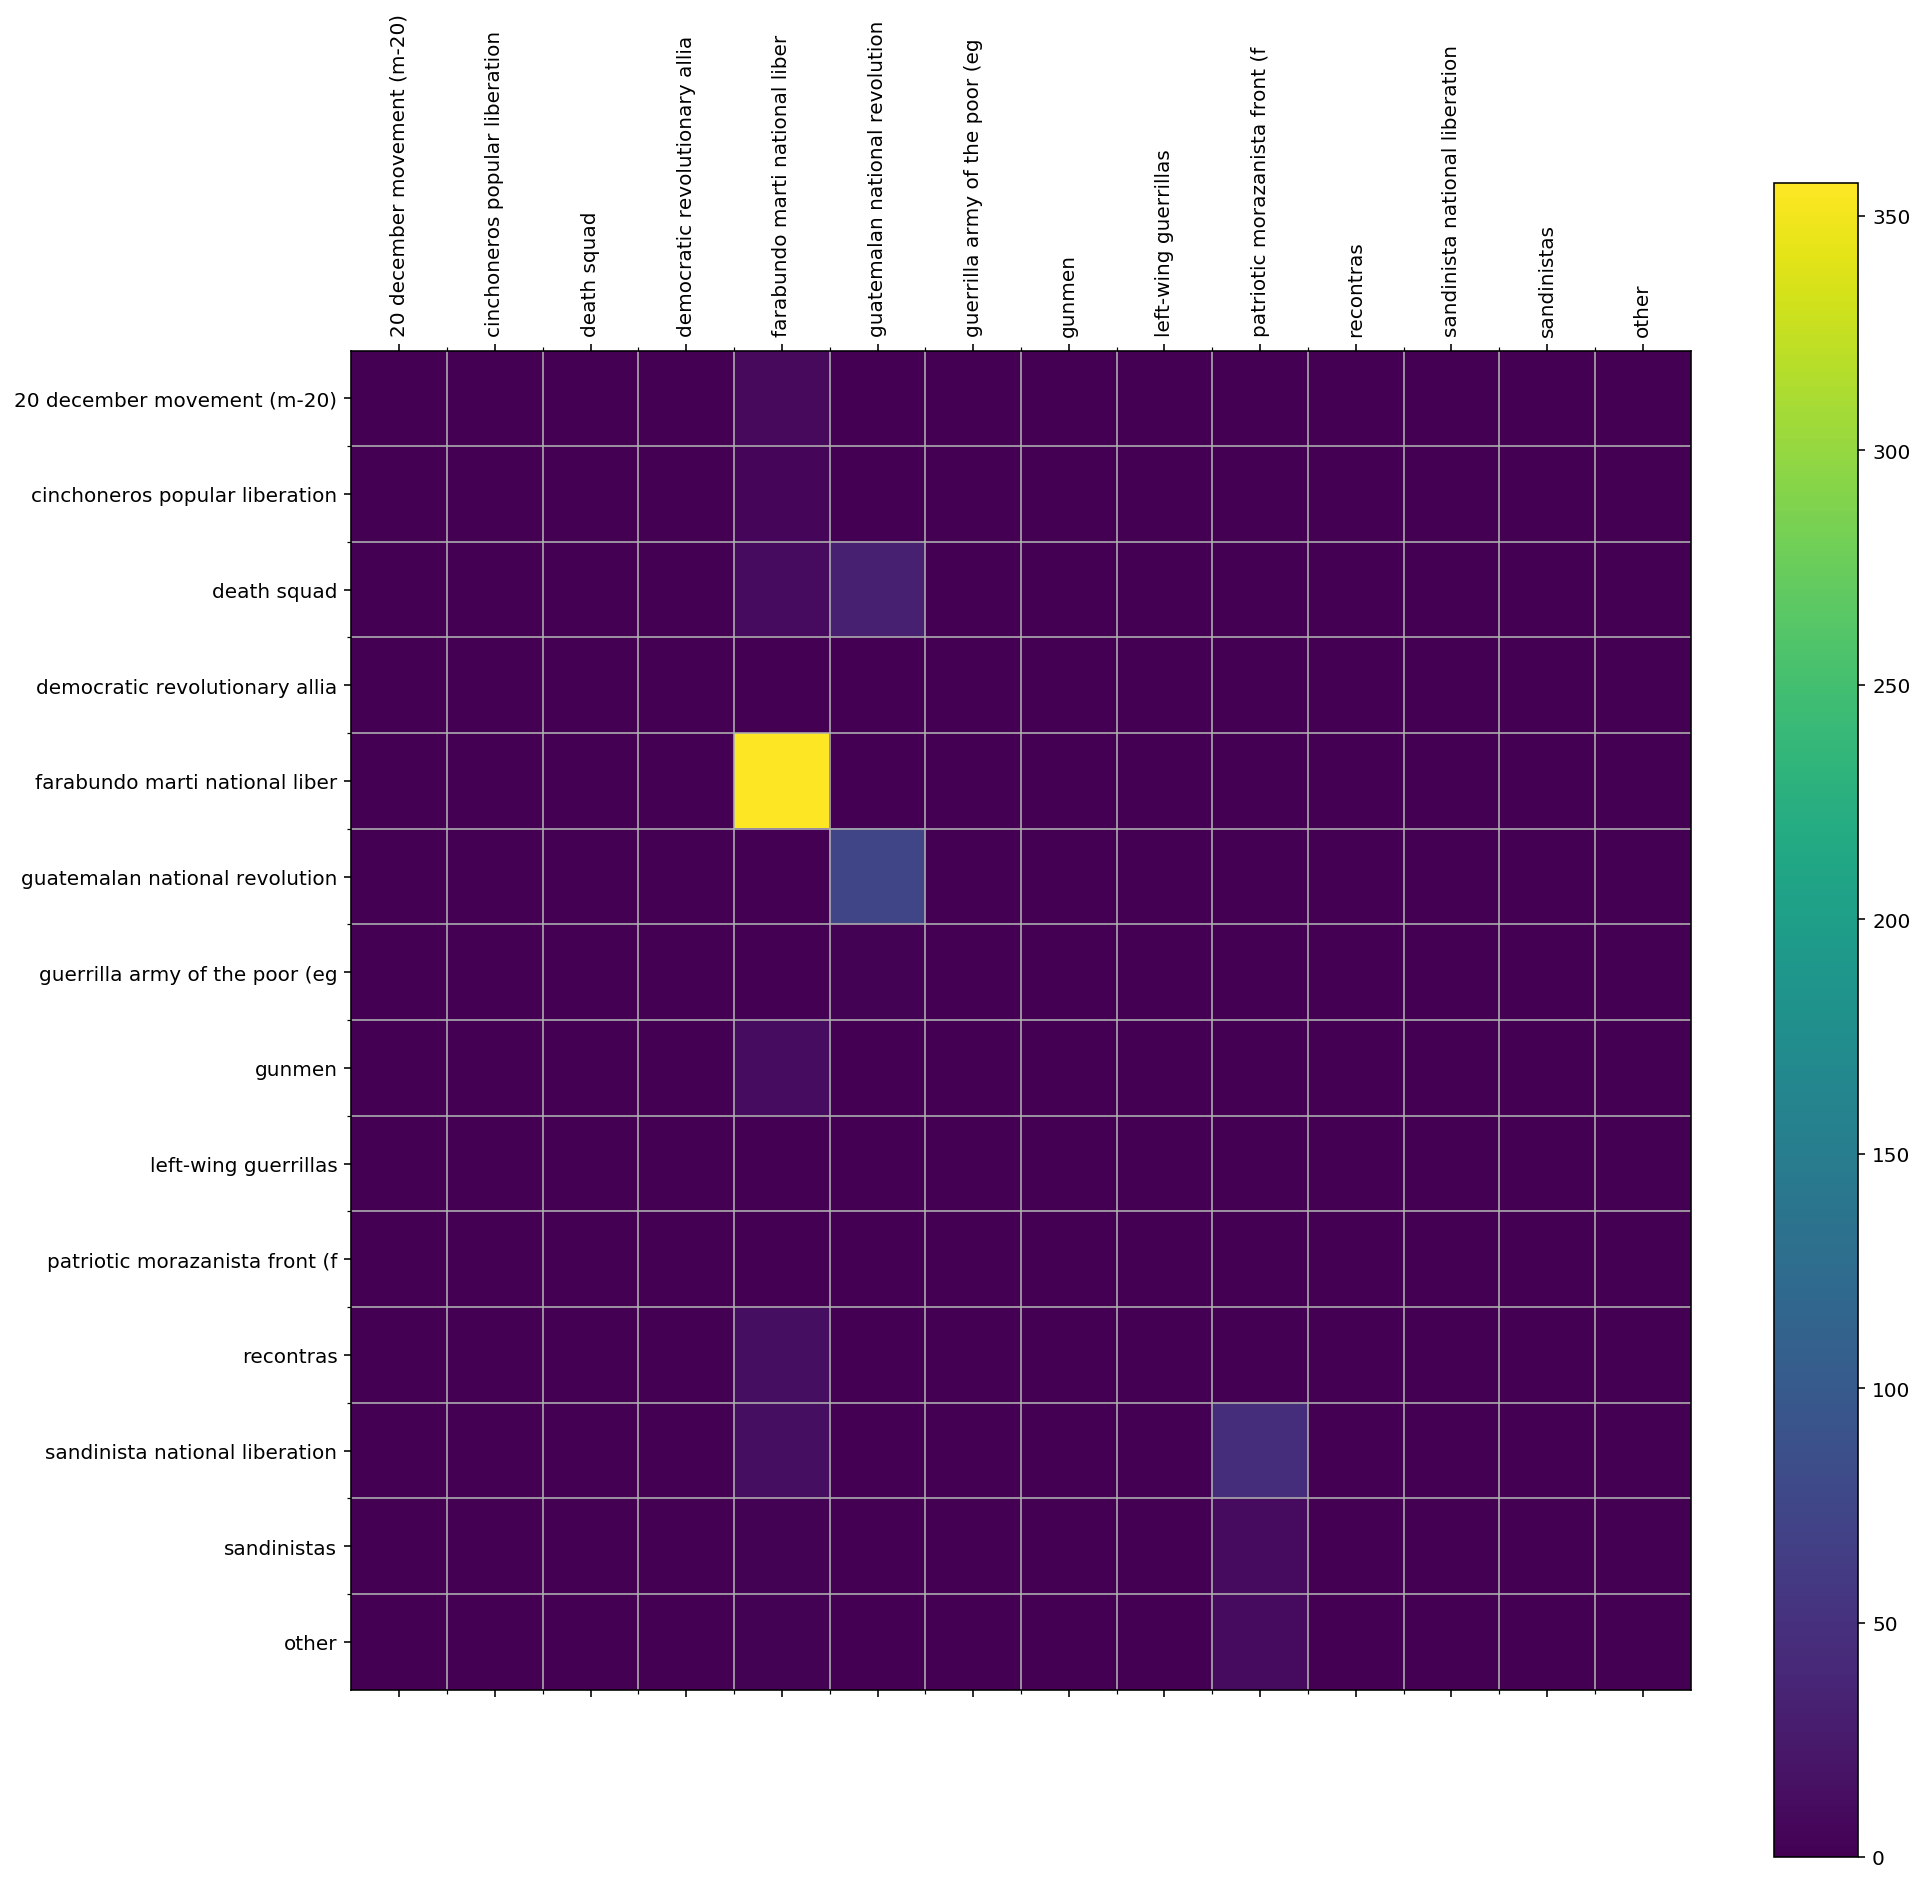

In [124]:
#print(len(test_Y))
#print(len(predicted_Y))

print(len(target_names_not_sure))
class_names = target_names_not_sure
class_names2 = [word[:30].lower() for word in class_names]

#confusion_matrix = sklearn.metrics.confusion_matrix(test_Y, predicted_Y, labels=class_names2)
confusion_matrix = sklearn.metrics.confusion_matrix(test_Y, predicted_Y_SVM)

print()
print(len(np.unique(test_Y)))
print(len(np.unique(predicted_Y)))
print("haha")

#print(test_groups.shape)
print(confusion_matrix.shape)
print(len(class_names))

#print(class_names)

plt.figure()
plt.rcParams['figure.figsize'] = (15, 15)

plt.matshow(confusion_matrix, interpolation='nearest')
plt.colorbar()

plt.xticks(np.arange(0,len(class_names2)+1), class_names2 + ["other"])
plt.yticks(np.arange(0,len(class_names2)+1), class_names2 + ["other"])

plt.xticks(rotation=90)

plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
plt.grid(which='minor')

plt.show()